In [290]:
pd.set_option('display.max.rows',50)

plt.style.use('fivethirtyeight')
#
from matplotlib import rc
import matplotlib

rc('font',family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [552]:
table=pd.read_excel("/Users/bnj/Downloads/purchase_transaction.xlsx",sheet_name=0,usecols=['Unnamed: 1','Unnamed: 2'])
table.columns = ['Name','Description']
table

,Name,Description
0,Name,Description
1,id,구매 건별 Identifier
2,Order_Id,주문번호
3,User_Id,사용자 Identifier
4,Purchase_Date,구매 날짜
5,Period,구매 주차 표시
6,Retailer,리테일러
7,ProductCode,"마트에서 부여한 상품코드(바코드, 또는 마트 자체 부여한 번호)"
8,Item_Description,상품명
9,Option,상품 옵션


In [558]:
df = pd.read_excel("/Users/bnj/Downloads/purchase_transaction.xlsx",sheet_name=1)
df.rename(columns={'MasterProdcutName': 'MasterProductName', 'MasterProdcutNo':'MasterProductNo'},inplace=True)
df.dropna(inplace=True)
df.head()

,id,Order_Id,User_Id,Purchase_Date,Period,Retailer,ProductCode,Item_Description,Sales_Unit,Price,Agegroup,Gender,MasterProductNo,MasterProductName,MasterCategoryFullNo,MasterCategoryFullName
0,95717,3475eb780c3eeac686a75a00b6b46257,d41d8cd98f00b204e9800998ecf8427e,2019-01-18,20190103,A,2019011861178490,우리가 보낸 가장 긴 밤,1,12400,60,M,2019011861178490,우리가 보낸 가장 긴 밤,C001002700080009,문구 · 취미 · 자동차용품->도서 · 퍼즐->시 · 에세이
1,95718,3475eb780c3eeac686a75a00b6b46257,981ac26310e4d1ab74ae250b71fb1bbe,2019-01-18,20190103,A,2019011861178490,우리가 보낸 가장 긴 밤,1,12400,30,M,2019011861178490,우리가 보낸 가장 긴 밤,C001002700080009,문구 · 취미 · 자동차용품->도서 · 퍼즐->시 · 에세이
2,95719,fba423b18a74d4aeaf1e69356bd10bd7,981ac26310e4d1ab74ae250b71fb1bbe,2019-09-16,20190138,C,8809486799871,바나밸리 바나나,1,3000,30,M,8809486799871,바나밸리 바나나,C001001300080001,과일->바나나 · 파인애플->바나나
3,95720,406b8f0a04b420cff9c1002ea17d1480,981ac26310e4d1ab74ae250b71fb1bbe,2019-09-16,20190138,C,1500000033750,왕자두6입/팩,1,7000,30,M,1500000033750,왕자두6입/팩,C001001300150005,과일->포도 · 수입포도 · 복숭아 · 자두 · 살구->자두
4,95721,3d9f53a8fd04e7b8b38fac156e9eefb0,981ac26310e4d1ab74ae250b71fb1bbe,2019-09-16,20190138,C,2500000049910,(A)당찬사과4-11입/봉,1,9000,30,M,2500000049910,당찬사과4-11입/봉,C001001300010001,과일->사과 · 배->사과


In [135]:
df.shape

(39620, 16)

In [136]:
df.isnull().sum()

id                        0
Order_Id                  0
User_Id                   0
Purchase_Date             0
Period                    0
Retailer                  0
ProductCode               0
Item_Description          0
Sales_Unit                0
Price                     0
Agegroup                  0
Gender                    1
MasterProductNo           0
MasterProductName         0
MasterCategoryFullNo      0
MasterCategoryFullName    0
dtype: int64

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39619 entries, 0 to 39619
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      39619 non-null  int64         
 1   Order_Id                39619 non-null  object        
 2   User_Id                 39619 non-null  object        
 3   Purchase_Date           39619 non-null  datetime64[ns]
 4   Period                  39619 non-null  int64         
 5   Retailer                39619 non-null  object        
 6   ProductCode             39619 non-null  object        
 7   Item_Description        39619 non-null  object        
 8   Sales_Unit              39619 non-null  int64         
 9   Price                   39619 non-null  int64         
 10  Agegroup                39619 non-null  int64         
 11  Gender                  39619 non-null  object        
 12  MasterProductNo         39619 non-null  object

In [139]:
df.describe()

,id,Period,Sales_Unit,Price,Agegroup
count,39619.0000,39619.0000,39619.0000,39619.0000,39619.0000
mean,255252.2365,20199199.7278,1.3445,26926.5605,35.1874
std,58457.7112,2901.5628,6.8678,1421179.6098,7.9597
min,95717.0000,20190101.0000,1.0000,0.0000,10.0000
25%,213688.5000,20200118.0000,1.0000,2100.0000,30.0000
50%,280101.0000,20200132.0000,1.0000,4000.0000,30.0000
75%,298281.5000,20200136.0000,1.0000,8000.0000,40.0000
max,319330.0000,20200140.0000,693.0000,100001400.0000,70.0000


**Observation**

* 상품을 한 번에 693개를 산 row가 존재.
* Price에 min, max를 보니 이상치가 있음.

In [33]:
# df.query('Item_Description.str.contains("400G")')

In [559]:
df['Large_Category']=df['MasterCategoryFullName'].str.split('->',expand=True)[0]
df['Medium_Category']=df['MasterCategoryFullName'].str.split('->',expand=True)[1]
df['Small_Category']=df['MasterCategoryFullName'].str.split('->',expand=True)[2]

In [560]:
df = df.drop(['id','MasterCategoryFullName'],1)

In [427]:
from IPython.core.display import HTML

def value_counts_all(df, columns):
    pd.set_option('display.max_rows',50)
    table_list=[]
    for col in columns:
        table_list.append(pd.DataFrame(df[col].value_counts()))
    return HTML(f"<table><tr> {''.join(['<td>'+table._repr_html_() + '</td>' for table in table_list])} </tr></table>")

value_counts_all(df, df.select_dtypes(include='object'))

,Order_Id
aaf4f365fd9aa23e3b3f622e1c2d1a30,47
5c7fff5afad34b016c0e728745abb18a,43
82f2547fa4b0d7b579e6fe7881156f61,41
47a2354c3e32d0830eb71a82a8b4504e,40
19e6fbeef7c52b1033cedd019a21e9a0,39
...,...
701c312ec0e3809946eea1fea30ff0e4,1
5f7f0578c84fdb63f6da859e5b099503,1
273461509586de6ab5c0035c8d30dd73,1
be73155164e3523369e08f781d559fdb,1


In [579]:
df[df['Price'] > 100000]

,Order_Id,User_Id,Purchase_Date,Period,Retailer,ProductCode,Item_Description,Sales_Unit,Price,Agegroup,Gender,MasterProductNo,MasterProductName,MasterCategoryFullNo,Large_Category,Medium_Category,Small_Category
331,c6c9b3f91df2d9d86450b427aa86c0f5,f611387aa61e9fa1bd70f3072712eecc,2019-10-26,20190143,C,2000000871530,빈센트협탁,1,109000,50,M,2000000871530,빈센트협탁,C001002500010007,가구 · 수납 · 조명 · 보수,가구,수납가구
425,c9e5c480e13af14a35e94adb97bfb47c,6a4d6e0f2159c7e5a8508bf908e5ac1c,2019-12-05,20190149,C,2220027678442,N거위털국민벤치코트C,1,129000,30,M,2220027678442,N거위털국민벤치코트C,C001002800010003,성인 · 아동의류,남성의류,남성아우터
622,92ebe295d0a68a234d842d66639c7d02,ed0012825ebb155c3a2da8d11c5e2580,2019-11-10,20190145,C,0718037854120,WD 외장SSD 256GB(MY,1,119000,30,M,718037854120,WD 외장SSD 256GB(MY,C001005900040001,가전,저장장치 · 네트워크,외장하드 · SSD · HDD
804,5b16341e958a8fe19088dc54bfa4eb3a,e64290b9db4d3ed0a4964691223d8422,2019-11-23,20190147,C,8809140955056,T55AGZZ1TU,1,598000,30,M,8809140955056,T55AGZZ1TU,C001005900090001,가전,TV · 영상기기,LED TV
851,6091f0774d1948d72ededed55e042b42,e64290b9db4d3ed0a4964691223d8422,2019-11-02,20190144,C,8809421190046,쿠쿠 6인용 압력밥솥,1,108000,30,M,8809421190046,쿠쿠 6인용 압력밥솥,C001005900130002,가전,주방가전,일반 전기밥솥
1268,f1d6502f86a0a61da81d2d3146874a93,3becb8dc42d4ce59176c70322a8ba617,2019-12-07,20190149,C,7332543670765,일렉 퓨어Q9 PQ91-3BW,1,499000,20,F,7332543670765,일렉 퓨어Q9 PQ91-3BW,C001005900140002,가전,생활가전,핸디 · 스틱형청소기
2116,4006847f3711d8fa67ad28ba5cf8681c,de61bcd9d69945722c762a23cd05e9dd,2019-11-26,20190148,C,8806090002946,★UN75RU7190F-S,1,2800000,50,M,8806090002946,★UN75RU7190F-S,C00000000000,Unknown,None,None
2117,4ea341165262bc9210edf538c8902d28,de61bcd9d69945722c762a23cd05e9dd,2019-11-26,20190148,C,8806088150147,삼성_RT53K6035SL,1,795000,50,M,8806088150147,삼성_RT53K6035SL,C00000000000,Unknown,None,None
2717,d92d204dccafaefec39c2052d2e7113d,1def92d9bc6ca7d9373520780e8abd82,2019-12-15,20190150,C,8809421198875,쿠쿠 10인용 IH CRP-H,1,378000,40,M,8809421198875,쿠쿠 10인용 IH CRP-H,C001005900130002,가전,주방가전,일반 전기밥솥
7010,0d31a96735b9f605fb50d904ac2ccf05,875d612e5a4c3b5fef16e4d05ccfb7d9,2020-04-11,20200115,B,2000143655096,핸)스톰북14오피스,1,399000,40,M,2000143655096,핸)스톰북14오피스,C001005900010001,가전,노트북 · PC · 태블릿,노트북


**Observation**

* 10만원이 넘는 것들은 이런 것들이 있습니다.

# Visulization

In [561]:
cat_cols=df.select_dtypes(include='object').columns.tolist()
num_cols=df.select_dtypes(exclude=['object','datetime64[ns]']).columns.tolist()

## Numerical Columns

<Figure size 576x396 with 0 Axes>

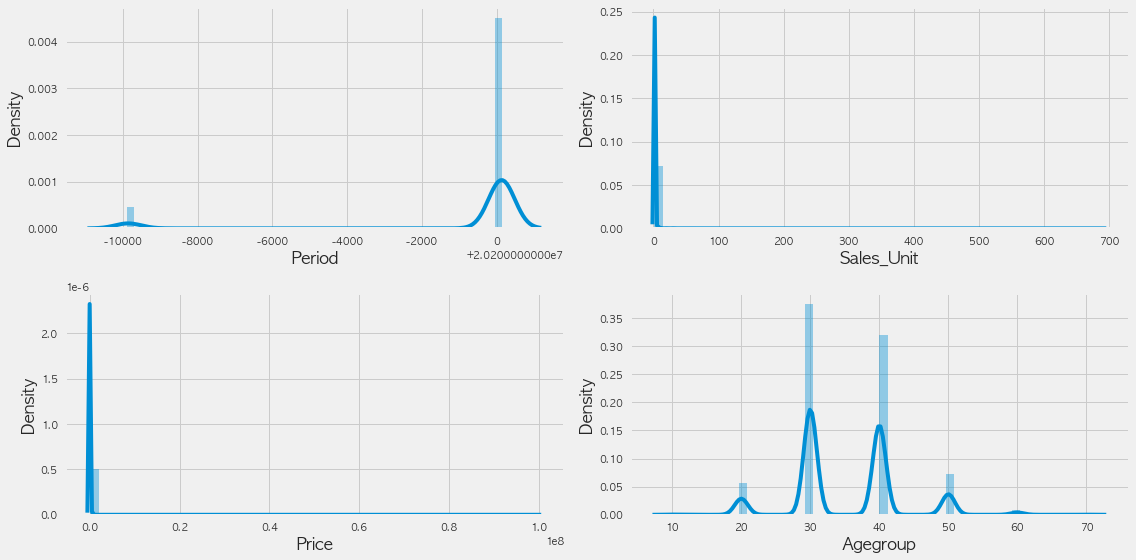

In [562]:
def show_dist_plot(data,columns):
    i =0
    plt.figure()
    plt.subplots(2,2,figsize=(16,8))
    for col in columns:
        i +=1
        plt.subplot(2,2,i)
        sns.distplot(df[col])
    plt.tight_layout()
show_dist_plot(df,num_cols)

In [563]:
#price
df[df['Price'] > 1.0*1e8]

,Order_Id,User_Id,Purchase_Date,Period,Retailer,ProductCode,Item_Description,Sales_Unit,Price,Agegroup,Gender,MasterProductNo,MasterProductName,MasterCategoryFullNo,Large_Category,Medium_Category,Small_Category
3521,daa362c1281c6a13f7691018d8928a07,db271f725386ab9100660cfa5f7d182f,2019-12-13,20190150,A,2700000010884,새우맛을알아?한판초밥(16입),1,100001300,50,F,2700000010884,새우맛을알아?한판초밥(16입),C001004000080002,치킨 · 초밥 · 베이커리,김밥 · 초밥 · 샐러드,김밥 · 초밥 · 도시락
3646,9f730ebe02094301c8cd2f765078fc35,b2289a6d8446384840cadc5b412f032f,2019-12-12,20190150,A,9880107480134,8한성 유부초밥 320g,1,100000300,40,F,9880107480134,8한성 유부초밥 320g,C001001600020003,우유 · 냉장냉동 · 간편식,맛살 · 어묵 · 단무지,유부
3647,50bf823431fa6b21e566f576b0d6b422,b2289a6d8446384840cadc5b412f032f,2019-12-12,20190150,A,6490268832027,1하치 생 오로시 와사비 45G,1,100000100,40,F,4902688320271,하치 생 오로시 와사비(45G),C001001700070004,생수 · 과자 · 라면 · 커피,조미료 · 설탕 · 소금,후추 · 향신료
3648,8a441e535b11c301601da83fdb79fc30,b2289a6d8446384840cadc5b412f032f,2019-12-12,20190150,A,3040059044000,0가시오이(개),1,100000100,40,F,1132690025921,가시오이(개),C001001200030001,채소,오이 · 호박 · 가지 · 옥수수,오이 · 가지
3650,804e6f4a5d4fd046c96542eac98a40c4,b2289a6d8446384840cadc5b412f032f,2019-12-12,20190150,A,8880959744011,2[제] 깐마늘 300g,1,100000300,40,F,8880959744011,2[제] 깐마늘 300g,C001001200060002,채소,양파 · 마늘 · 생강 · 파,마늘 · 생강
3703,daa362c1281c6a13f7691018d8928a07,b2289a6d8446384840cadc5b412f032f,2020-01-08,20200102,A,2700000010884,새우맛을알아?한판초밥(16입),1,100001300,40,F,2700000010884,새우맛을알아?한판초밥(16입),C001004000080002,치킨 · 초밥 · 베이커리,김밥 · 초밥 · 샐러드,김밥 · 초밥 · 도시락
3704,d826b17eaa71d871af759a35f599ea42,b2289a6d8446384840cadc5b412f032f,2020-01-08,20200102,A,7043000067571,5재사용봉투(부산북구)20L*낱장(V19),1,100000100,40,F,7043000067571,5재사용봉투(부산북구)20L*낱장(V19),C00000000000,Unknown,None,None
38709,daa362c1281c6a13f7691018d8928a07,ebafa77abbc29be90a2c7e2b20cedf1d,2020-10-03,20200140,A,2700000010884,새우맛을알아?한판초밥(16입),1,100001400,30,M,2700000010884,새우맛을알아?한판초밥(16입),C001004000080002,치킨 · 초밥 · 베이커리,김밥 · 초밥 · 샐러드,김밥 · 초밥 · 도시락


**Observation**

* 이상하게도 동일인의 40대 여성이 Price가 1억인 6품목을 구매했습니다.

In [564]:
#위 품목들을 모두 지우겠습니다.
df.drop(df[df['Price'] > 1.0*1e8].index,0, inplace=True)

## Categorical Variables(Gender, Retailer, Age)

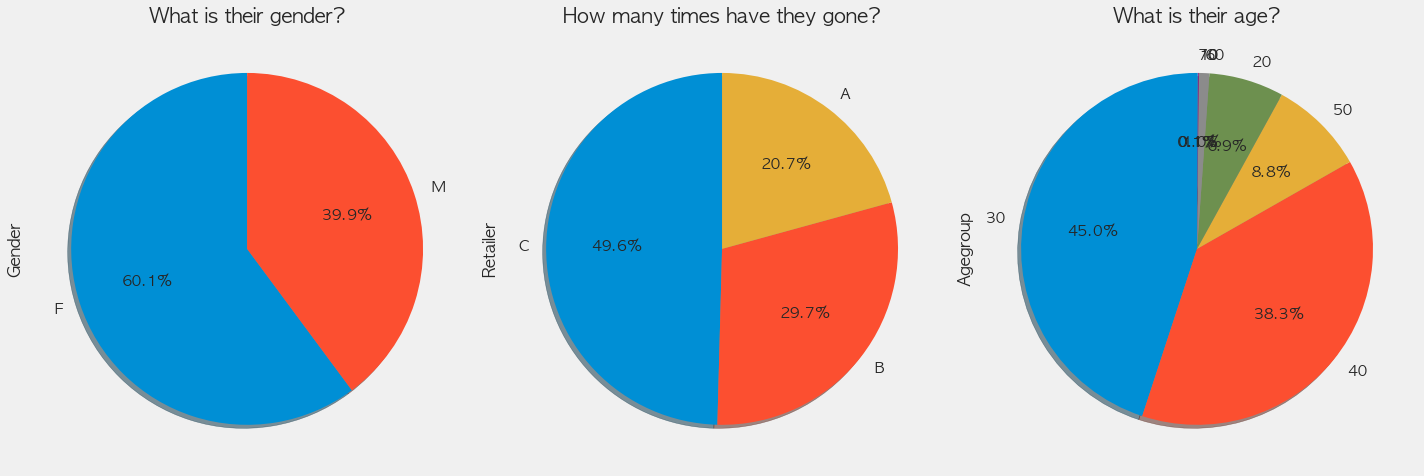

In [510]:
f,ax=plt.subplots(1,3,figsize=(20,16))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=90, fontsize=15,title='What is their gender?',ax=ax[0])
df['Retailer'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=90, fontsize=15,title='How many times have they gone?',ax=ax[1])
df['Agegroup'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=90, fontsize=15,title='What is their age?',ax=ax[2])
plt.tight_layout()

**Observation**

* 해당 데이터에서 여성의 비율이 높습니다.
* C지점에서 가장 많은 구매와 A지점에서 가장 적은 구매가 이루어집니다.
* 30,40,50,20대 순으로 구매빈도가 높습니다.

## 어떤 제품을 많이 구매할까?

<Figure size 576x396 with 0 Axes>

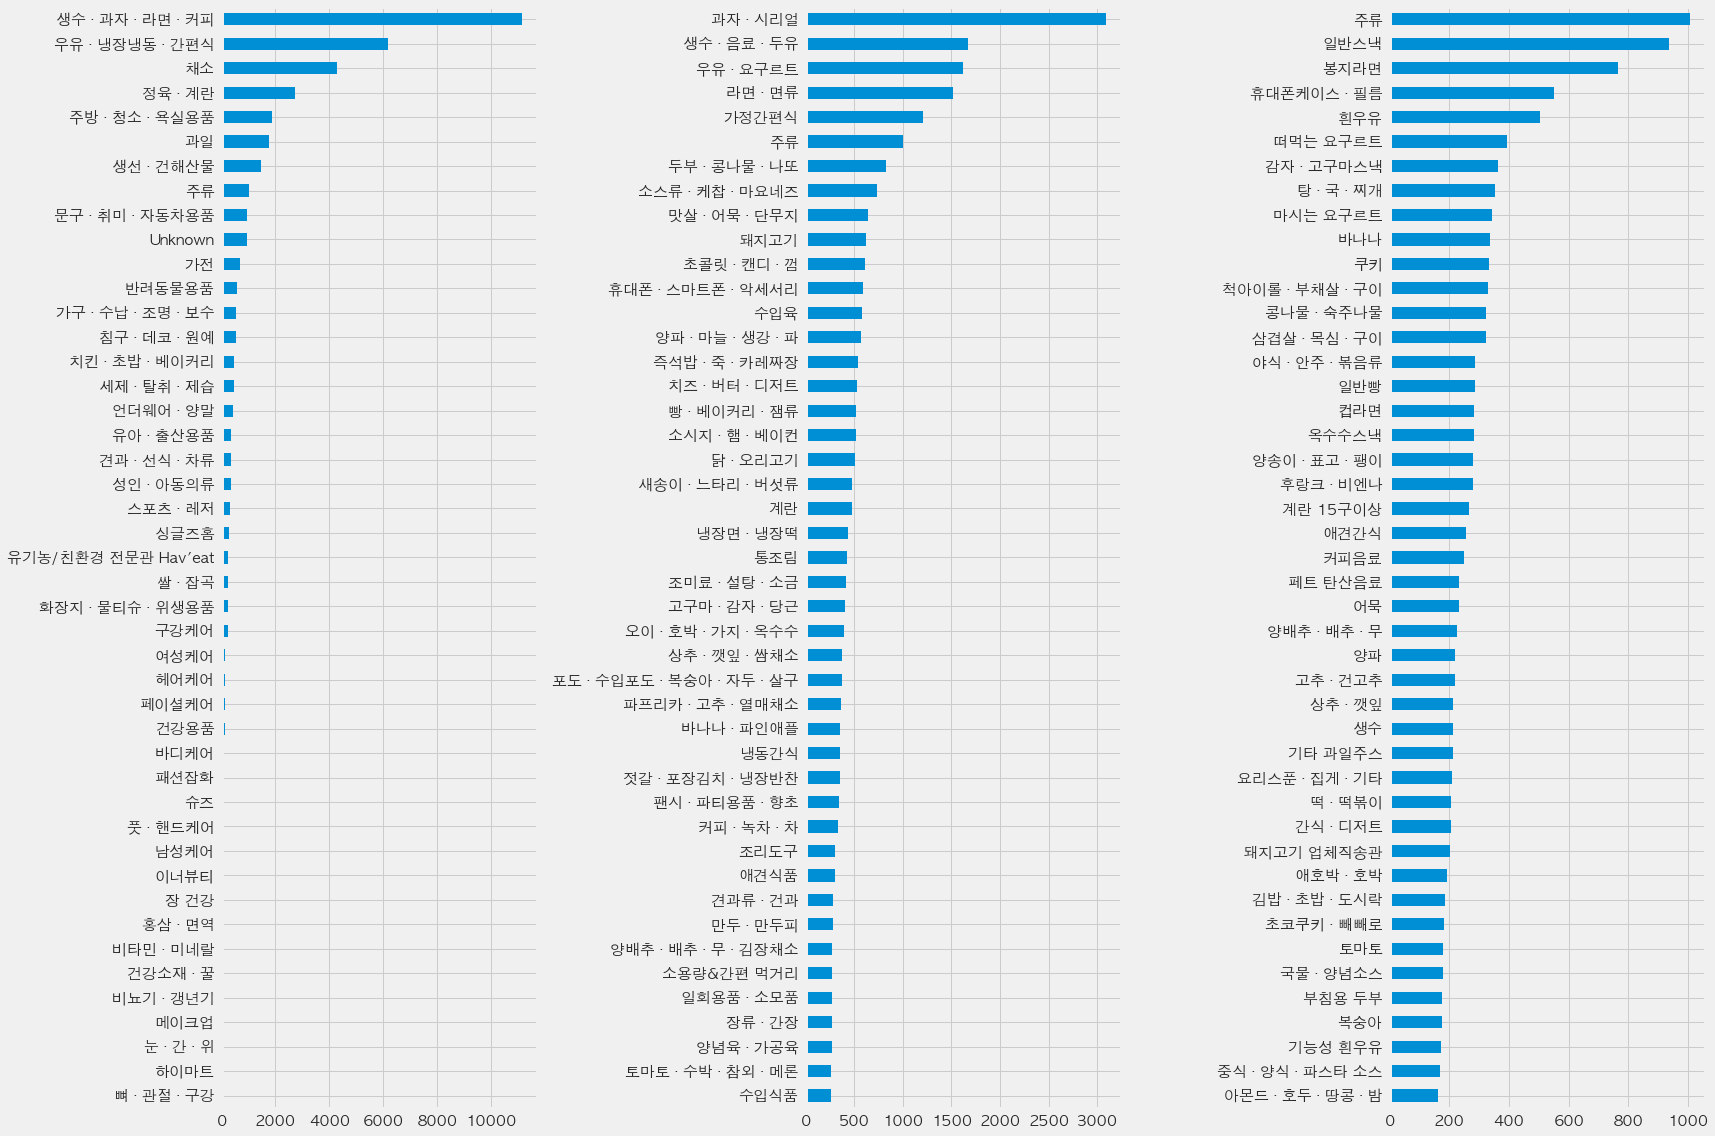

In [511]:
plt.figure()
f,ax=plt.subplots(1,3,figsize=(24,16))
df['Large_Category'].value_counts(ascending=True).plot.barh(fontsize=15,ax=ax[0])
df['Medium_Category'].value_counts(ascending=True)[192:].plot.barh(fontsize=15,ax=ax[1])
df['Small_Category'].value_counts(ascending=True)[981:].plot.barh(fontsize=15,ax=ax[2])
plt.tight_layout()

## 지점별 어떤 물품을 주로 구매하는가?

<Figure size 576x396 with 0 Axes>

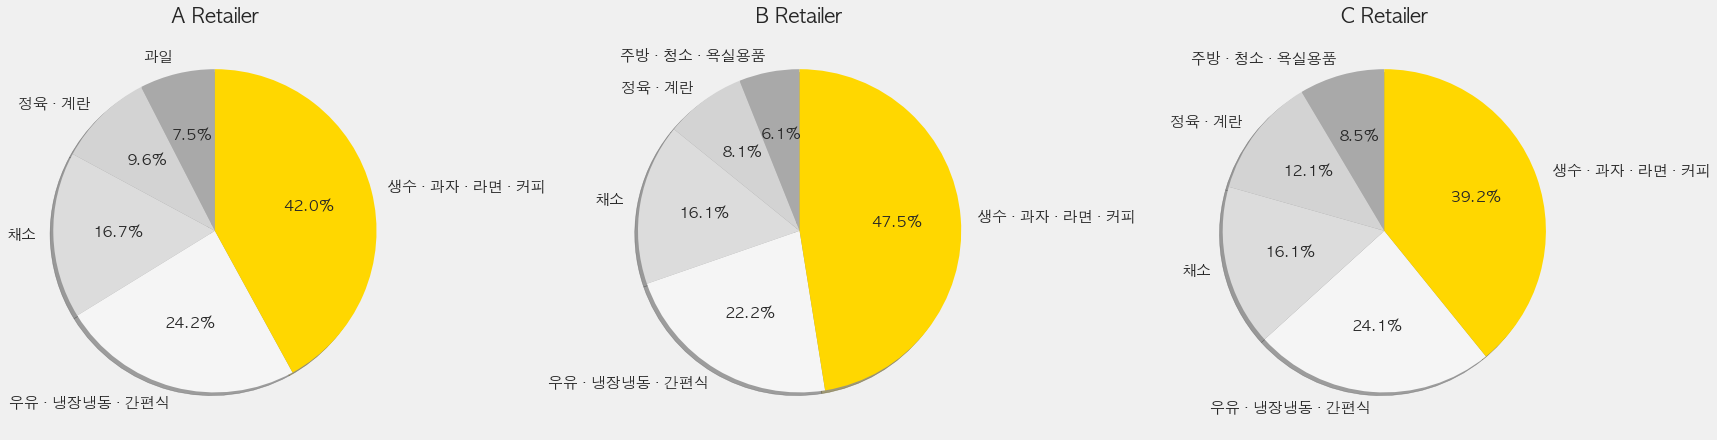

In [567]:
#A지점
colors = ['darkgrey', 'lightgray', 'gainsboro', 'whitesmoke','gold']
plt.figure()
f,ax=plt.subplots(1,3,figsize=(24,16))
df[df['Retailer']=='A']['Large_Category'].value_counts(ascending=True)[-5:].plot.pie(autopct='%1.1f%%',shadow=True, startangle=90, fontsize=15,title='A Retailer',ax=ax[0],ylabel='',colors=colors)
df[df['Retailer']=='B']['Large_Category'].value_counts(ascending=True)[-5:].plot.pie(autopct='%1.1f%%',shadow=True, startangle=90, fontsize=15,title='B Retailer',ax=ax[1],ylabel='',colors=colors)
df[df['Retailer']=='C']['Large_Category'].value_counts(ascending=True)[-5:].plot.pie(autopct='%1.1f%%',shadow=True, startangle=90, fontsize=15,title='C Retailer',ax=ax[2],ylabel='',colors=colors)

plt.tight_layout();

<Figure size 576x396 with 0 Axes>

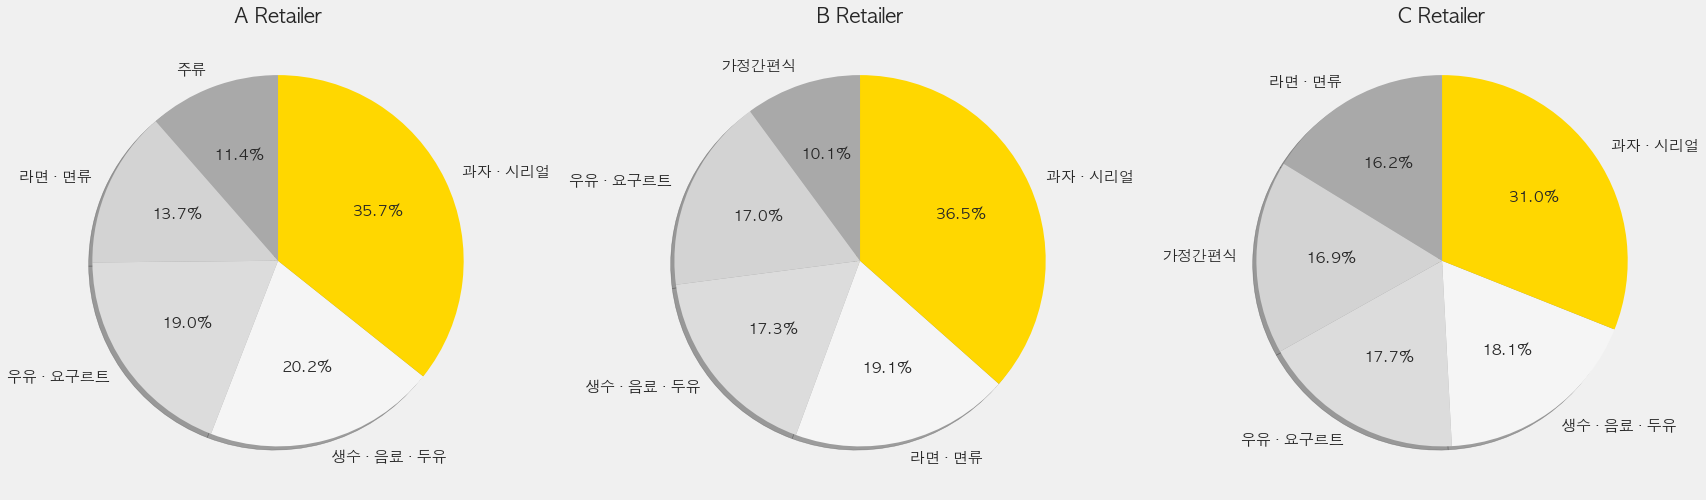

In [568]:
plt.figure()
f,ax=plt.subplots(1,3,figsize=(24,16))
df[df['Retailer']=='A']['Medium_Category'].value_counts(ascending=True)[-5:].plot.pie(autopct='%1.1f%%',shadow=True, startangle=90, fontsize=15,title='A Retailer',ax=ax[0],ylabel='',colors=colors)
df[df['Retailer']=='B']['Medium_Category'].value_counts(ascending=True)[-5:].plot.pie(autopct='%1.1f%%',shadow=True, startangle=90, fontsize=15,title='B Retailer',ax=ax[1],ylabel='',colors=colors)
df[df['Retailer']=='C']['Medium_Category'].value_counts(ascending=True)[-5:].plot.pie(autopct='%1.1f%%',shadow=True, startangle=90, fontsize=15,title='C Retailer',ax=ax[2],ylabel='',colors=colors)

plt.tight_layout();

<Figure size 576x396 with 0 Axes>

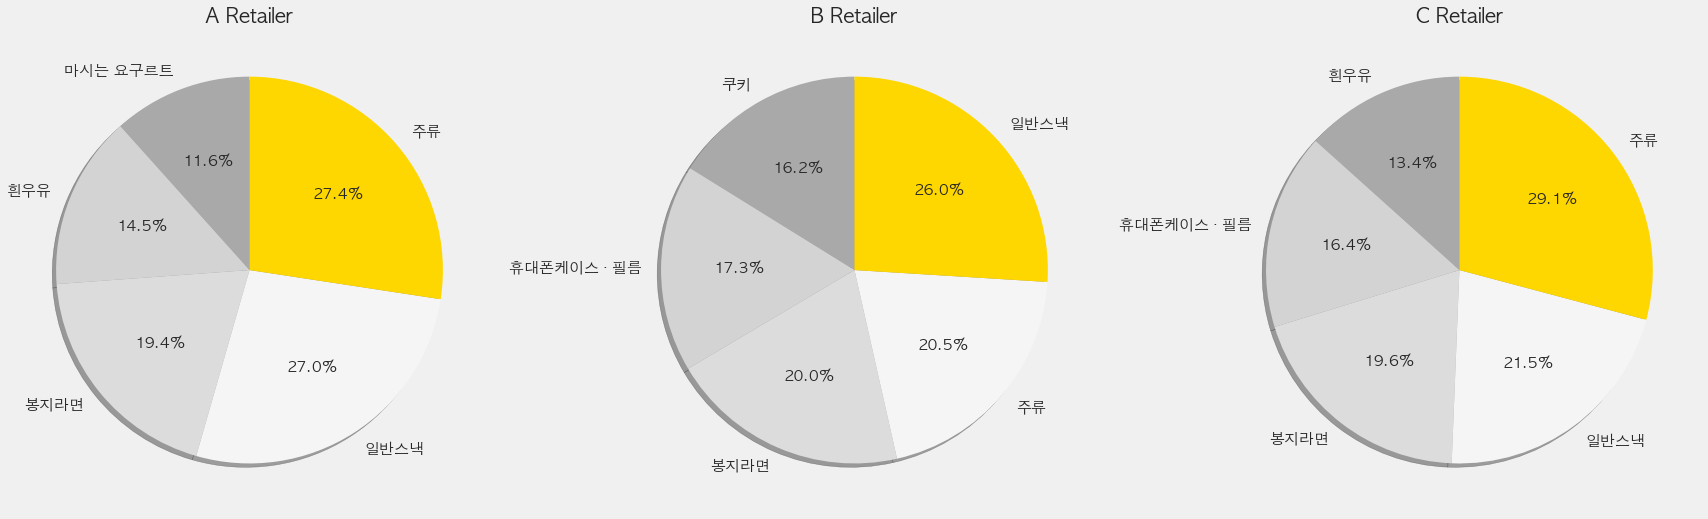

In [569]:
#C지점
plt.figure()
f,ax=plt.subplots(1,3,figsize=(24,16))
df[df['Retailer']=='A']['Small_Category'].value_counts(ascending=True)[-5:].plot.pie(autopct='%1.1f%%',shadow=True, startangle=90, fontsize=15,title='A Retailer',ax=ax[0],ylabel='',colors=colors)
df[df['Retailer']=='B']['Small_Category'].value_counts(ascending=True)[-5:].plot.pie(autopct='%1.1f%%',shadow=True, startangle=90, fontsize=15,title='B Retailer',ax=ax[1],ylabel='',colors=colors)
df[df['Retailer']=='C']['Small_Category'].value_counts(ascending=True)[-5:].plot.pie(autopct='%1.1f%%',shadow=True, startangle=90, fontsize=15,title='C Retailer',ax=ax[2],ylabel='',colors=colors)

plt.tight_layout();

**Observation**

* A,B,C 지점 모두 생수,과자,라면,시리얼,커피를 주로 구매하지만 B지점에서는 일반 스낵을 더욱 구매합니다. B지점에서 10대들이 더욱 사용할 것으로 보입니다.

# 지점별 각 연령들의 구매력은?

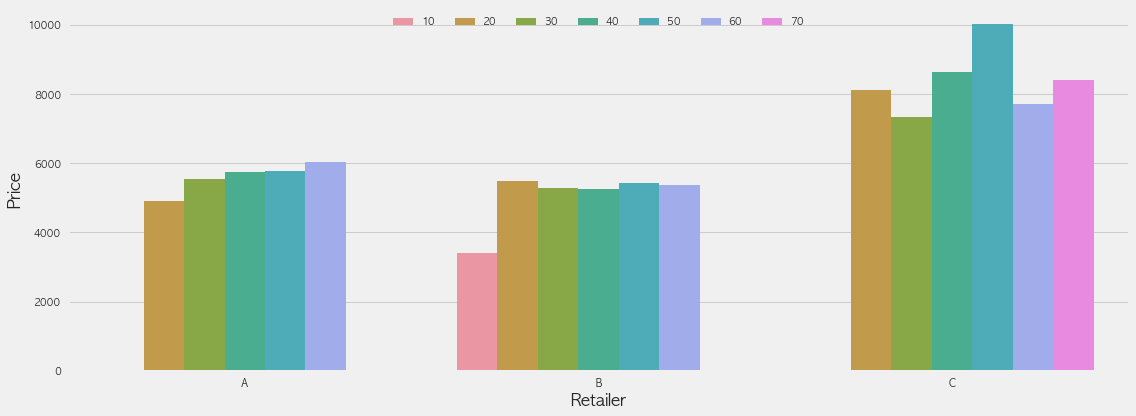

In [606]:
plt.figure(figsize=(16,6))
sns.barplot(data=df, x='Retailer',y='Price',hue='Agegroup',order=['A','B','C'],ci=None)
plt.legend(loc="upper center", ncol=len(df.columns))
plt.tight_layout()

**Observation**

* 평균적으로 40,50,30대 순으로 높은 구매력을 보여줍니다.
* 10대들은 B지점만 이용합니다.
* 70대는 C지점만 이용합니다.
* 10대와 70대는 A지점을 전혀 사용하지 않습니다.

In [592]:
df.groupby(['Agegroup'])['Price'].mean()

Agegroup
10   3415.3846
20   6566.6422
30   6406.2163
40   7003.7596
50   7378.4274
60   7030.6283
70   8404.1667
Name: Price, dtype: float64

> 왜 C지점에서 높은 구매력을 보여주는걸까?

## 가정1. C지점에 비싼 제품이 있다.

In [576]:
print("A지점에서 가장 높은 가격 :",df[df['Retailer']=='A']['Price'].max())
print("B지점에서 가장 높은 가격 :",df[df['Retailer']=='B']['Price'].max())
print("C지점에서 가장 높은 가격 :",df[df['Retailer']=='C']['Price'].max())

A지점에서 가장 높은 가격 : 188100
B지점에서 가장 높은 가격 : 399000
C지점에서 가장 높은 가격 : 3446000


## 가정2. A,B지점보다 단순히 더 높은 빈도로 구매를 했을 뿐이다.

# Unknown?

In [144]:
df1 = df[df['Large_Category'] =='Unknown']
df1['MasterProductName'].unique()

array(['대여용부직포쇼핑백', '△종량봉투20L(군포시청', 'M스피드그래픽반TCHXL', '폴햄 의류 29,900',
       '△재사용종량20L(수지)', '에브리데이 국민가격', '이마트 진심을 담은', '대림 마당놀이300g',
       '노브랜드리얼팜340g*2', '뉴트리원 메가 울트라 오메가-3 세트',
       '에이션패션 대형 의류 로드쇼 (29,900 균일가)', '종량제봉투20L(신)_천', '재사용봉투20L',
       '행사코드', '경상도식 농어막회', '종량제봉투20L_NB부산', 'M&H2', '다이소 균일가 (1,000)',
       '크리스피파이', '19_해피랜드 용품', '노브랜드 쫄깃매콤낙', '허브리프 200ml', '노브랜드 국산콩으로',
       '1865 셀렉티드 블렌드', '리틀밥독 아동행사(3000)', '리틀밥독 아동의류 행사(10000',
       '세바메드페미나인인티', '△재사용봉투20L(춘천)', '코노수르비씨클레타샤', '마미갸또(서현점_저울대용)',
       '일렉트로맨 베이직목', '대봉시4입/팩', '범벅세트', '재사용종량제 20L_세', '롯데 1980원 균일가',
       '앙드레김골프 행사', '다이소 균일가 (3,000)', '네이처리퍼블릭10', '롯데 골라담기',
       '롯데 마구 골라담기', '종량제봉투(5L*10)', 'M&H1', '재사용봉투20L(고잔)', '할인코드',
       'A/S료 입금증', 'WR/에센셜/스파게티', '피코크 프로폴리스캔', 'DU 69,900원 1+1',
       '재사용봉투 (금천구) 20L', '대여용장바구니', '폼드팡(1000원)', '(HJF)청삼대 팝업',
       '130원 공병(신)', '재사용봉투 (김해시) 20L', '스테이크(갈비맛)', '100원 공병(신)',
       '스테인리스 다용도집', '에브리데이국민가격', '노브랜드 크라비150g', '에브리데이국민가격에',


**Observation** 

* MasterProductName 전처리가 필요.
* 왜 Unknown으로 표현되었을까?

# 정규식 표현

In [170]:
import re 

def clean_text(texts): 
    corpus = [] 
    for i in range(0, len(texts)): 
        review = re.sub(r'[◆◐㉪♪@♥㉣♣ⓟ㉢㉩ⓒ△%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"\n\]\[\>\<]', '',texts[i]) #@%*=()/+ 와 같은 문장부호 제거
        review = re.sub(r'\d+','',review)#숫자 제거
        review = review.lower() #소문자 변환
        review = re.sub(r'\s+', ' ', review) #extra space 제거
        review = re.sub(r'<[^>]+>','',review) #Html tags 제거
        review = re.sub(r'\s+', ' ', review) #spaces 제거
        review = re.sub(r"^\s+", '', review) #space from start 제거
        review = re.sub(r'\s+$', '', review) #space from the end 제거
        review = re.sub(r'_', ' ', review) #space from the end 제거
        review = re.sub(r'l', ' ', review)
        corpus.append(review) 
        
    return corpus

clean_text(df['MasterProductName'].tolist())

['우리가 보낸 가장 긴 밤',
 '우리가 보낸 가장 긴 밤',
 '바나밸리 바나나',
 '왕자두입팩',
 '당찬사과입봉',
 '프레스코 샐러드',
 '풀무원 옛두부g입',
 '프리미엄생연어초밥',
 '완숙토마토입팩',
 '제스프리그린키위팩',
 '햇사과 kg봉',
 '대여용부직포쇼핑백',
 'do e 스위티오바나나',
 'cj 오곡참깨 드레싱g',
 '닭가슴살샐러드',
 '시저샐러드',
 '지중해 샐러드팩',
 '알타리단',
 '해피바스 코튼플라워 퍼퓸 바디워시 g 입',
 '해피바스바디워시',
 '수앤수',
 '바나밸리 바나나',
 '왕자두입팩',
 '당찬사과입봉',
 '프레스코 샐러드',
 '풀무원 옛두부g입',
 '프리미엄생연어초밥',
 '완숙토마토입팩',
 '제스프리그린키위팩',
 '햇사과 kg봉',
 '대여용부직포쇼핑백',
 'do e 스위티오바나나',
 'cj 오곡참깨 드레싱g',
 '닭가슴살샐러드',
 '시저샐러드',
 '지중해 샐러드팩',
 '샘표 진간장 금fm ',
 '윌리안 바이젠 m ',
 'agap무농약 뿌리없',
 '제주 삼다수 ',
 '흙대파봉',
 '메디안치약덴탈케어잇몸 g g',
 '호주산냉장안심',
 '질퓨전u프로텍션',
 '메디안 치석 치약 맥스g입',
 '맨소래담립케어 세트 입',
 '이마트 카놀라유  ',
 '덴탈케어 fx 입',
 '서울 저지방 우유m ',
 '하인즈 유기농 케찹g입',
 '엄선돈삼겹살수육용',
 '윌리안 라거 m ',
 '도스코파스까버네쇼비',
 '이마트올리브유 ',
 '하림자연실록닭가슴살',
 '청정원직화굴소스g',
 '프리미엄 스위티오 바나나kg내외',
 '그라인더통후추 g',
 '단감 입봉',
 '가농 등급란 개입',
 '태국미니아스파라거스',
 '귤림원감귤 kg박',
 '양상추봉',
 '이마트 해바라기유  ',
 '윌리안 에일 m ',
 '브로콜리입봉',
 '백설 천일염 허브맛솔트순한g',
 '구운아몬드g',
 '해표 고소한참기름m ',
 '이맛쌀kg',
 '마즈 이클립스 페퍼민트g',
 '저스트